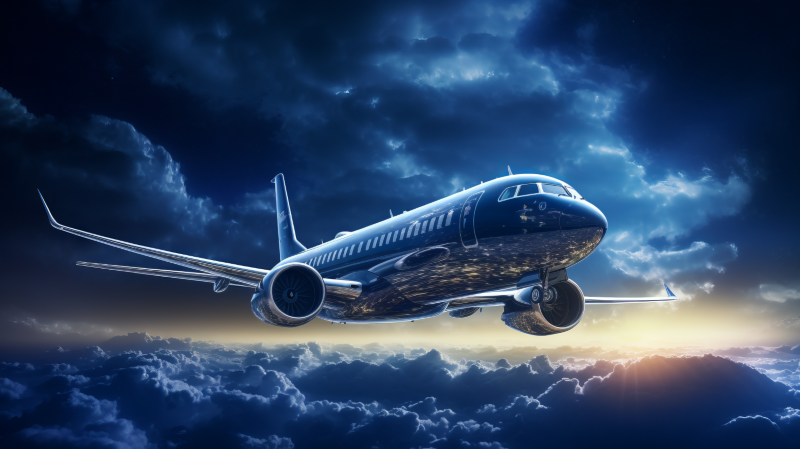 
-

Project by: FCSD Team 10

Lim Jun Jie (U2323401A) - Coding + Slides

Toh Hong (U2321363A) - Coding + Slides

Yuvraj Singh (U2323724E) - Slides

<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Introduction</p>
</div>

In the modern era, where traveling has become a fundamental aspect of our lives, finding the most affordable flight tickets is crucial. The cost of flights fluctuates based on various factors, such as the airlines, timing of booking, departure schedules, and seating classes. For those looking to navigate their travels economically and efficiently, grasping the complex pricing patterns of airline tickets is essential.

This project sets out to explore the complex dynamics behind flight pricing, utilizing an extensive flight dataset. Our goal is to not only predict the prices of flights with precision but also to discover insights that will aid travelers in their search for cost-effective and convenient travel solutions.

This project utilizes a dataset which encompasses 300,261 unique flight booking alternatives, covering a timeframe of 50 days, from February 11th to March 31st, 2022. It has been compiled to facilitate data analysis and the development of predictive models for accurate flight price forecasting.

<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Problem Statement
</p>
</div>

### How do factors such as the choice of airline, timing of ticket purchase, departure and arrival times, variation, source and destination, and the class of service influence the pricing of airline tickets?

To structure our investigation effectively, we've segmented our primary question into **six** distinct sub-questions, each designed to explore a specific aspect of our overall inquiry:

a) Are ticket prices influenced by the flight's departure and arrival times? 

b) Is there a variation in ticket prices across different airlines? 

c) In what ways do ticket prices differ between Economy and Business class? 

d) How does altering the flight's origin and destination affect the price? 

e) Does a flight's duration play a role in varying the price?

f) Does the number of remaining days play a role in varying the price of flight tickets?

<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Imports
</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

flights_data = pd.read_csv('flights.csv')
flights_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,ch_code,dep_time,num_code
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,18:00,8709
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,19:00,8157
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,20:00,764
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,21:25,995
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,17:15,963


<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Data Cleaning and Transformation
</p>
</div>

We drop useless columns that are not relevant or useful to researching our problem statement

Columns to drop:
1) 'Unnamed: 0'
2) 'ch_code'
3) 'dep_time'
4) 'num_code'

We are also using Label encoding to transform categorical variables into numerical values

In [2]:
flights_data.drop(['Unnamed: 0','ch_code', 'dep_time', 'num_code'], axis=1, inplace=True)
flights_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Features
</p>
</div>

### Features
The various features of the cleaned dataset are explained below:
1. *Airline*:  This categorical feature denotes the name of the airline company, with six distinct airlines.
2. *Flight*: Another categorical feature, it stores the flight code information.
3. *Source City*: Categorical, representing the city from which the flight originates, with six unique cities.
4. *Departure Time*: This derived categorical feature groups departure times into bins, offering six unique time labels.
5. *Stops*:  Categorical, indicating the number of stops between the source and destination cities, with three distinct values.
6. *Arrival Time*: A derived categorical feature, grouping arrival times into bins with six distinct labels.
7. *Destination City*: City where the flight will land. It is a categorical feature having 6 unique cities.
8. *Class*: A categorical feature defining the seat class as either Business or Economy.
9. *Duration*: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. *Days Left*: This derived feature is calculated by subtracting the booking date from the trip date.
11. *Price*: The target variable, storing the ticket price information.

<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Exploratory Data Analysis
</p>
</div>

In [3]:
flights_data.info()
Duration = flights_data['duration']
DaysLeft = flights_data['days_left']
Price = flights_data['price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [4]:
flights_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


**Insights**
*  **Average Price** of flights dataset is **7425**, and the **maximum price** are **123071** and the **minimum price** are **1105**.
*  **Average Days Left** of flights is **26**, and the **maximum days left** are **49** and the **minimum days left** are **1**.
*  **Average Duration** of flights is **11.2**, and the **maximum duration** is **49.8** and the **minimum duration** is **0.8**.

## Boxplot Analysis

Text(0.5, 1.0, 'Price')

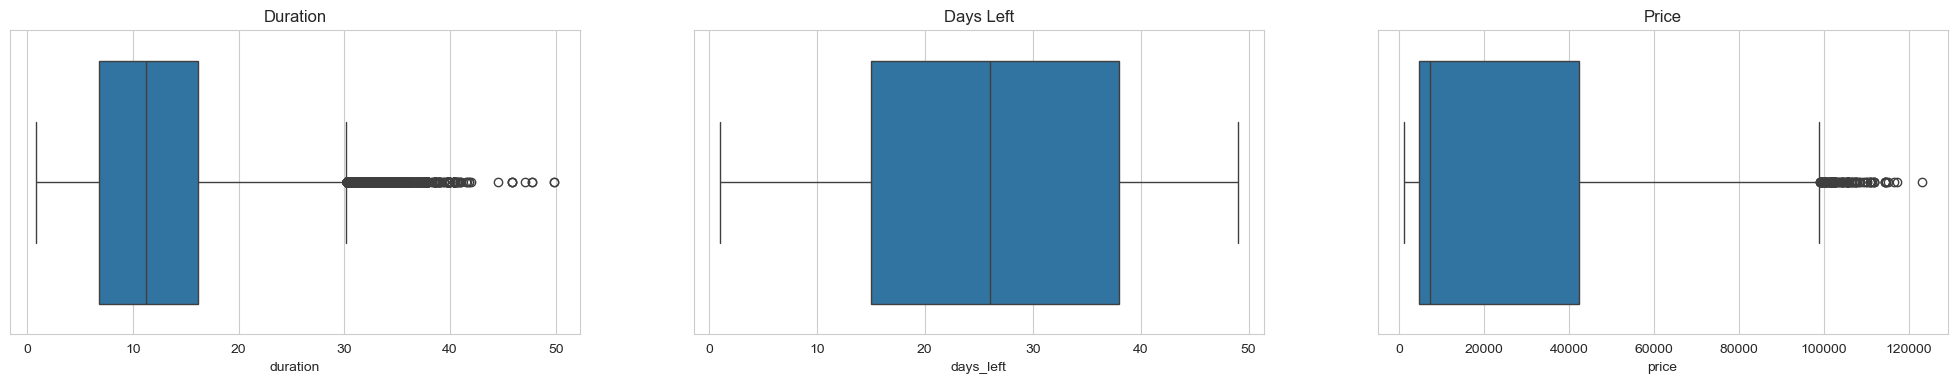

In [5]:
plt.figure(figsize=(25, 15))
grid = plt.GridSpec(3, 3, hspace=0.4)
plt.subplot(grid[0, 0])
sns.boxplot(x=flights_data["duration"], data=flights_data)
plt.title("Duration")

plt.subplot(grid[0, 1])
sns.boxplot(x=flights_data["days_left"], data=flights_data)
plt.title("Days Left")


plt.subplot(grid[0, 2])
sns.boxplot(x=flights_data["price"], data=flights_data)
plt.title("Price")

In [6]:
def countOutlier(flights_data):
    Q1 = flights_data.quantile(.25)
    Q3 = flights_data.quantile(.75)
    IQR = Q3-Q1
    count = 0
    for i in flights_data:
        if i > (Q3+1.5*IQR) or i < (Q1-1.5*IQR):
            count+=1
    return count

print("Duration has", countOutlier(Duration), "outliers.")
print("Days Left has", countOutlier(DaysLeft), "outliers.")
print("Price has", countOutlier(Price), "outliers.")

Duration has 2110 outliers.
Days Left has 0 outliers.
Price has 123 outliers.


<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b>
   From the above box-plots we can intuitively see that 'Duration' seems to have the most outliers. To find out more about the number of outliers, we have calculated the number of outliers for each numeric data. </b>
</div>

## Skewness Analysis

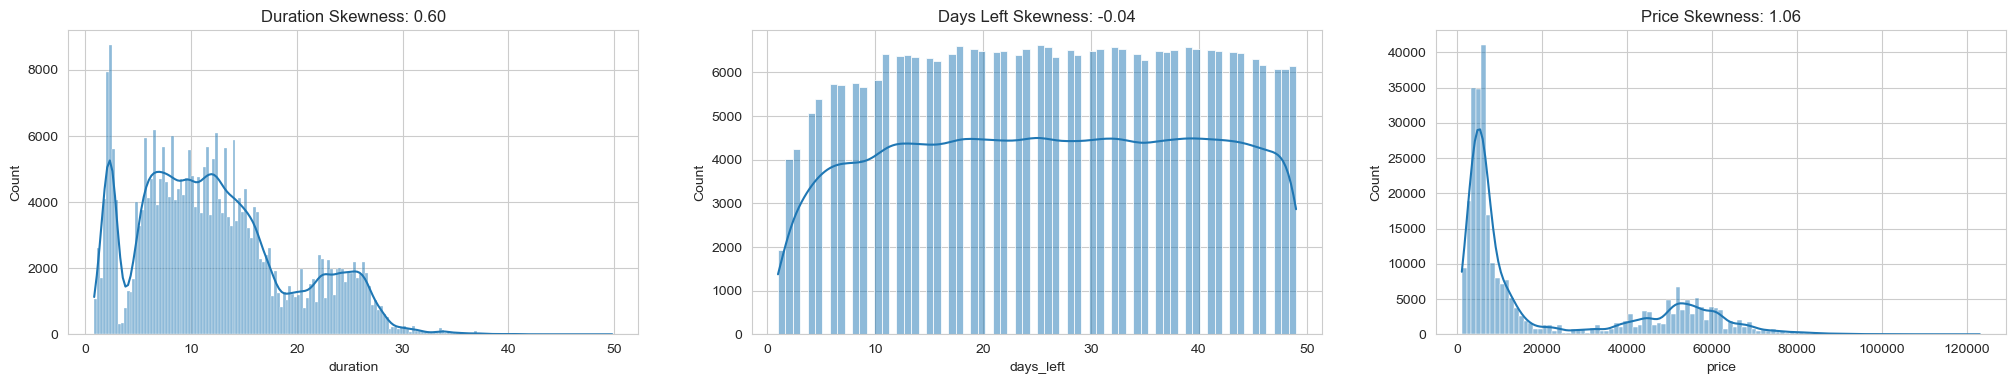

In [7]:
skew = flights_data[['duration', 'days_left', 'price']]
skew.skew()

# Create a figure with subplots
plt.figure(figsize=(25, 15))

# Create a grid for subplots
grid = plt.GridSpec(3, 3, hspace=0.4)

plt.subplot(grid[0, 0])
sns.histplot(flights_data["duration"], kde=True)
plt.title("Duration Skewness: {:.2f}".format(flights_data["duration"].skew()))

plt.subplot(grid[0, 1])
sns.histplot(flights_data["days_left"], kde=True)
plt.title("Days Left Skewness: {:.2f}".format(flights_data["days_left"].skew()))

plt.subplot(grid[0, 2])
sns.histplot(flights_data["price"], kde=True)
plt.title("Price Skewness: {:.2f}".format(flights_data["price"].skew()))

plt.show()

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b>
    The above skewness values provide insights into the shape of the data distributions: 'duration' and 'price' exhibit right-skewed or positive skewed distributions, with longer tails on the right and data concentrated on the left. 'days_Left' has a skewness value close to zero, indicating a nearly symmetric distribution, which means the data is relatively balanced without strong skewness in either direction </b>
</div>

## Correlation Analysis

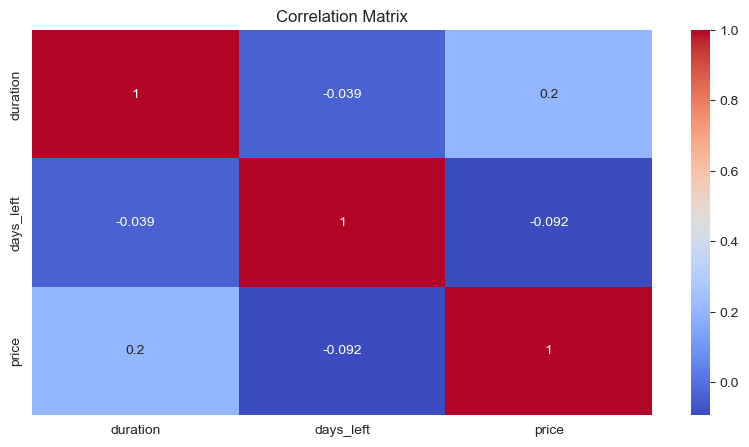

In [8]:
# Calculate the correlation matrix
corr_matrix = flights_data.select_dtypes(include=['number']).corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## a) Are ticket prices influenced by the flight's departure and arrival times?

Text(0.5, 1.0, 'Airline prices based on the departure time')

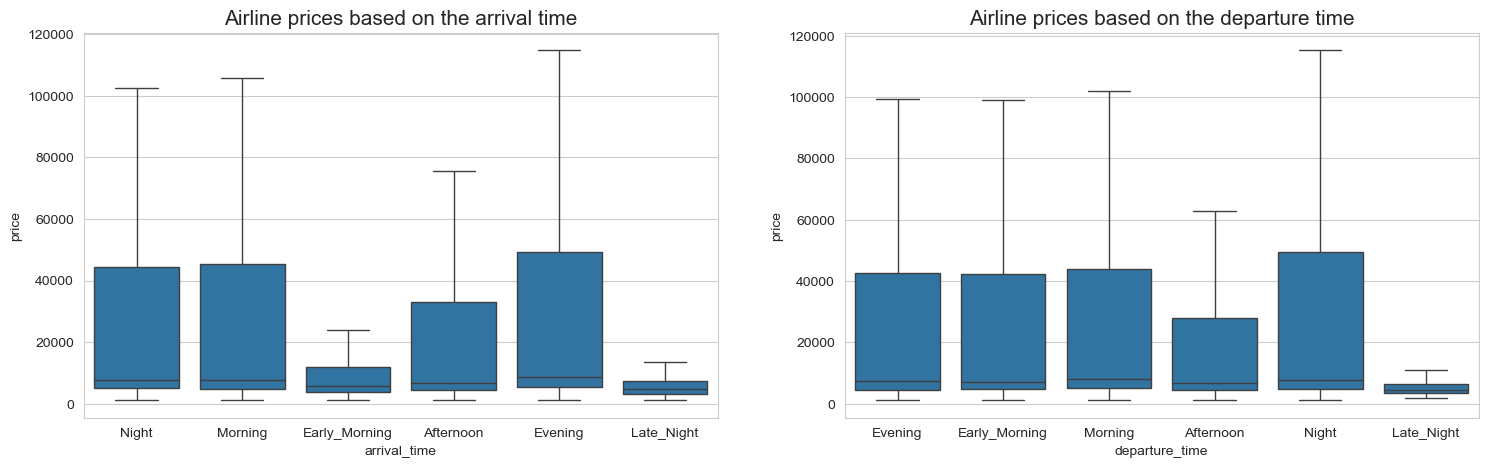

In [9]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=flights_data, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=flights_data, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b>
    The box plot indicates that leaving late at night or arriving at night remains the most cost-effective option. It's also visible that arriving early morning is also cheap and afternoon flights are a bit cheaper than evening, morning and night flights. </b>
</div>

## b) Is there a variation in ticket prices across different airlines?

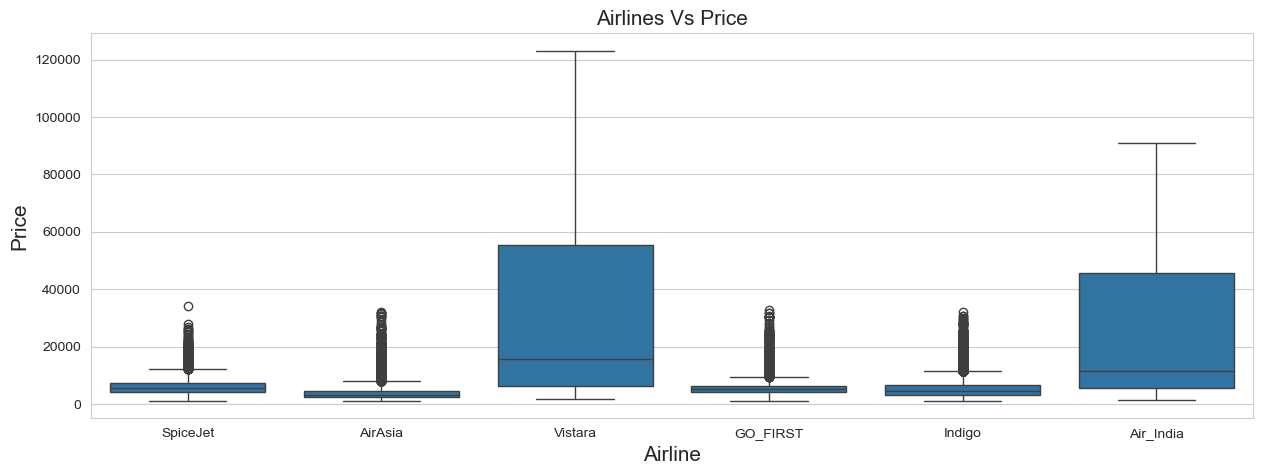

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(x=flights_data['airline'],y=flights_data['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b>
    Among the airlines, Air India and Vistara is having the most expensive flight tickets, whereas AirAsia provides the most affordable fares. Specifically, in the context of business class, Vistara's prices are the highest in comparison to AirAsia, SpiceJet, AirAsia, GO_First and Indigo seems to have around the same flight prices. </. 
</div>

## c) In what ways do ticket prices differ between Economy and Business class?

Text(0.5, 1.0, 'Airline prices based on the class and company')

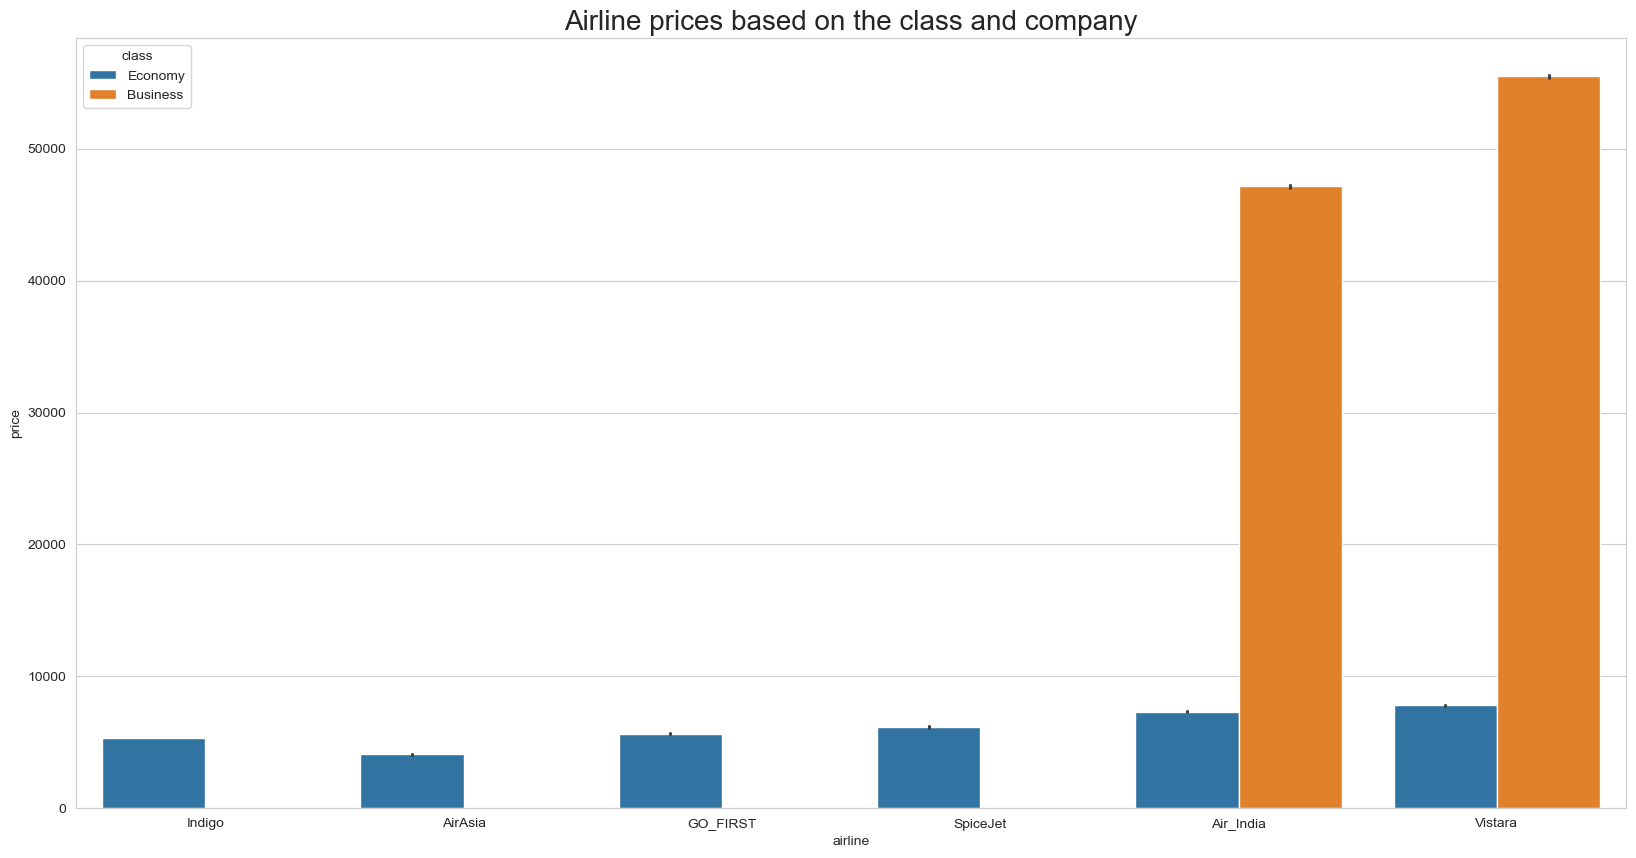

In [11]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=flights_data.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b> 
Only two companies, Air India and Vistara, offer business flights, and there exists a substantial price difference between the two classes, with business tickets costing nearly five times as much as economy tickets. Business class typically offers enhanced services and amenities compared to economy class, such as more comfortable seating, premium meals, dedicated check-in counters, priority boarding, and additional space, which explains why there is a big gap in the prices of ticket between economy and business class. </b>
</div>

## d) How does altering the flight's origin and destination affect the price? 

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

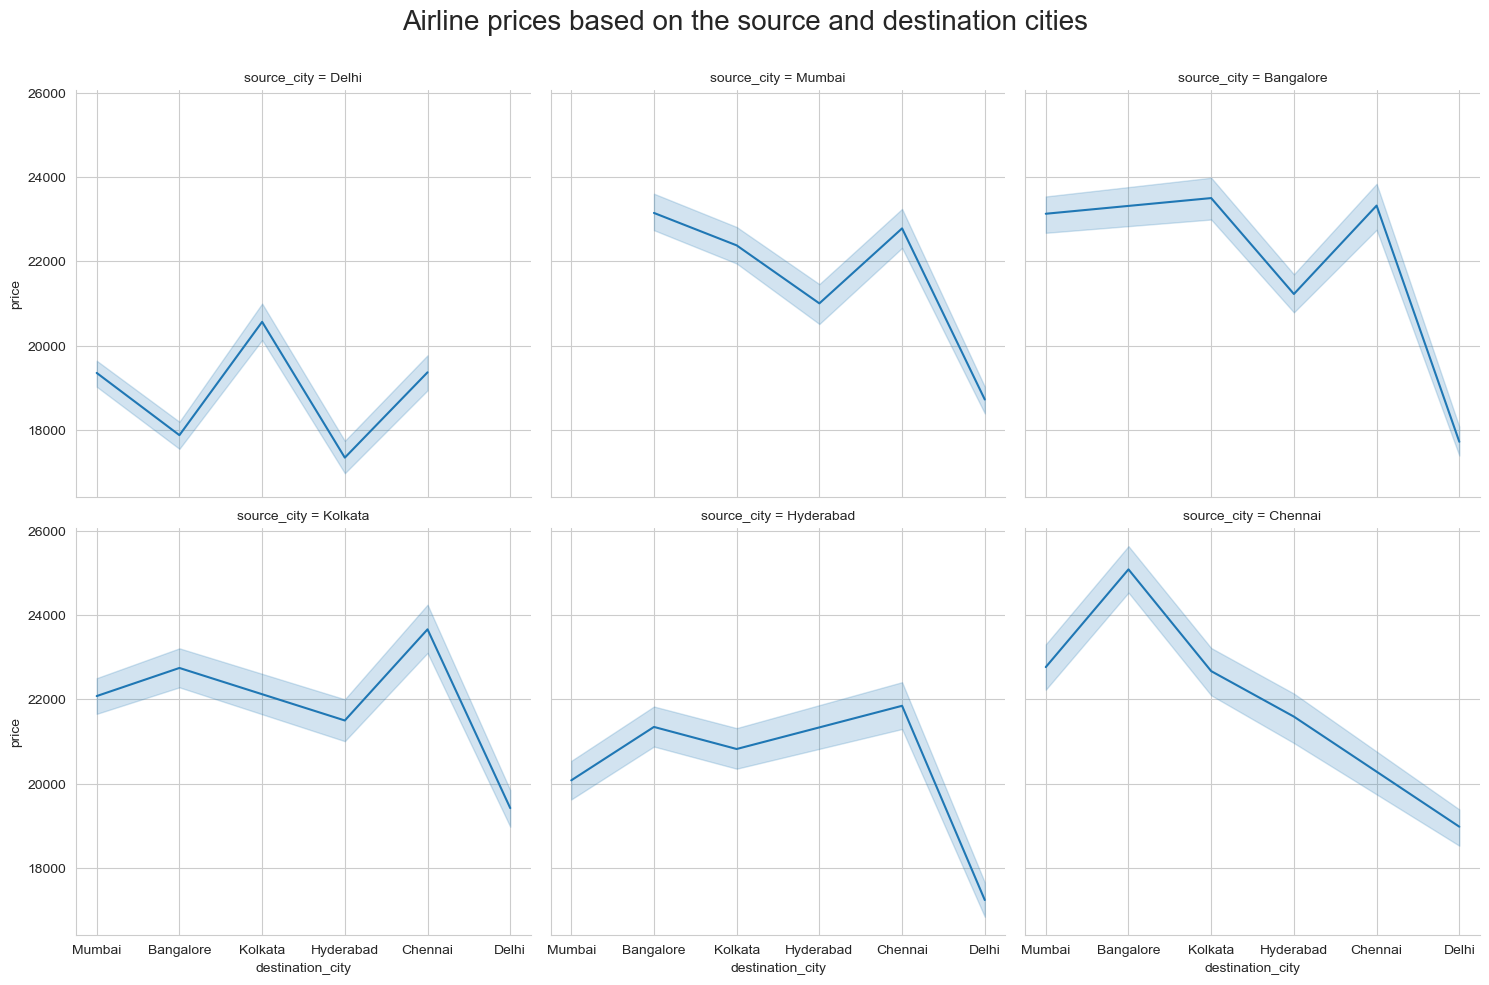

In [12]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=flights_data, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b>
    It appears that flights departing from Delhi are frequently more affordable compared to those from other departure cities, likely due to the fact that as a capital city which is most likely to be larger and offers a greater variety of flights. Flights leaving and arriving at Bangalore seems to be highly priced. On the other hand, overall prices are relatively consistent, with Hyderabad emerging as the most expensive destination. </b>
</div>

## e) Does a flight's duration play a role in varying the price?

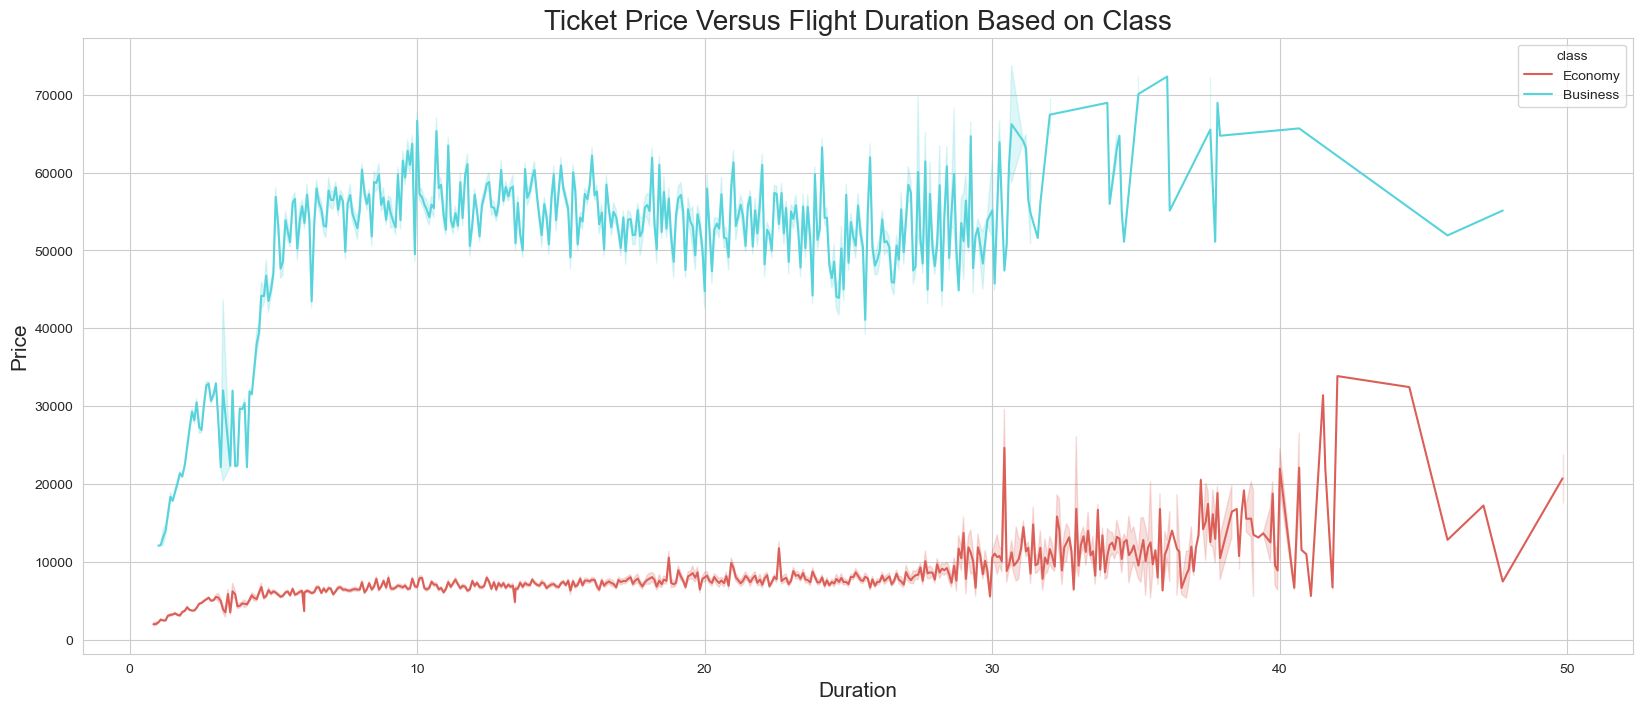

In [13]:
plt.figure(figsize=(20,8))
sns.lineplot(data=flights_data,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b>
    It is visible in the above that with the increase in duration, ticket price also increases for both economy and business classes. This is likely due to the fact that long flights typically require more fuel consumption, which is a significant operational cost for airlines. As the flight duration increases, so does the fuel consumption, leading to higher operating expenses. Airlines often pass on these increased costs to passengers through higher ticket prices. </b>
</div>

## f) Does the number of remaining days play a role in varying the price of flight tickets?

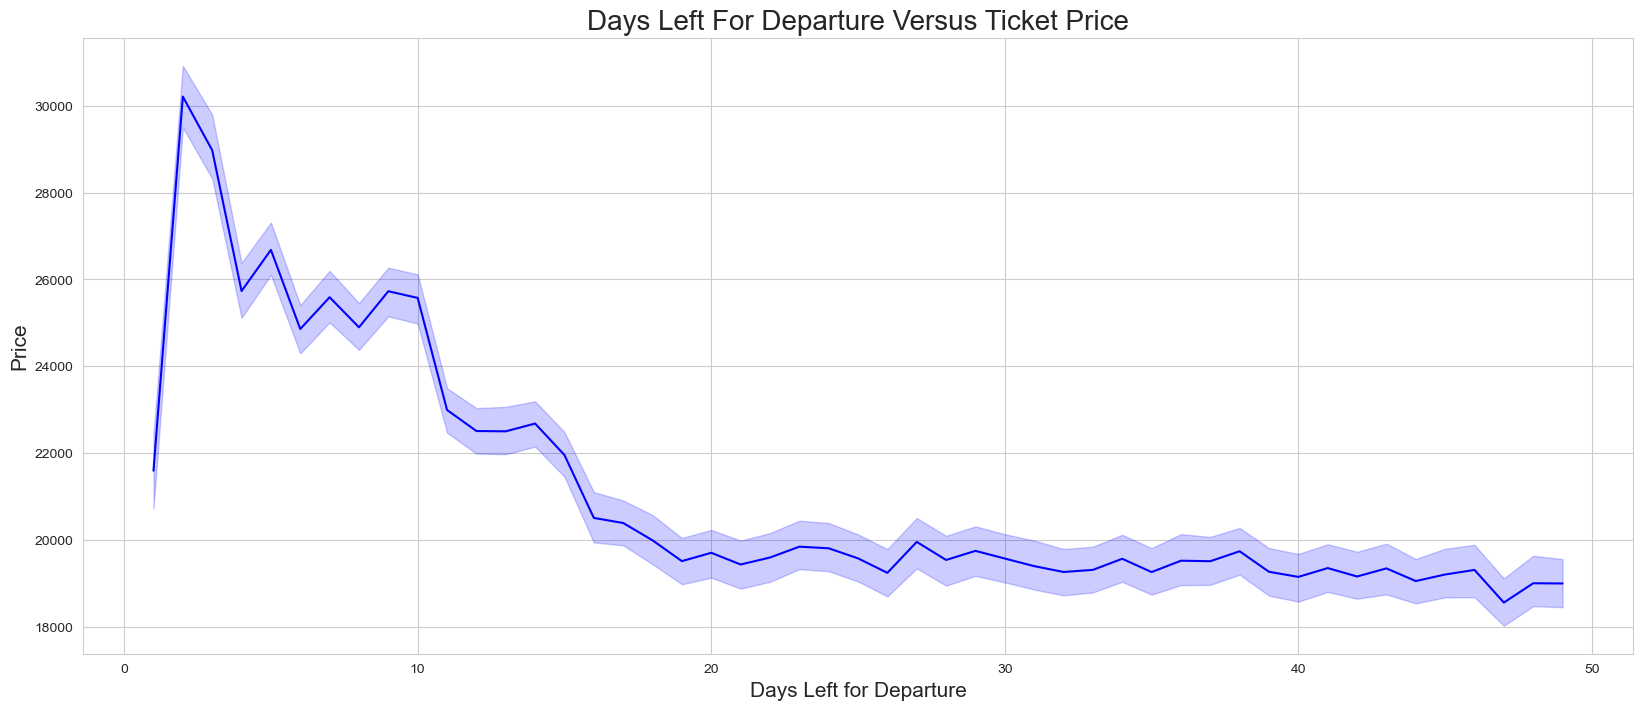

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(data=flights_data, x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<div class="alert alert-block alert-success"  style="font-size:16px">
    <b>Analysis:</b>
     As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines. The graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This pattern suggests that airlines may reduce ticket prices close to the departure date to fill empty seats and ensure high occupancy on their planes.</b>
</div>

<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Machine Learning - Predicting Price of Airlines
</p>
</div>

Our primary objective is to build a predictive model that can accurately forecast the prices of flights. 
By predicting flight prices, you aim to provide valuable insights to travelers, airlines, travel agencies, and other stakeholders in the aviation industry 
Predicting flight prices can help travelers make informed decisions about booking flights, optimizing their travel budgets, and finding the best deals.

In [15]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()
for columns in flights_data.columns:
    if flights_data[columns].dtype=='object':
        flights_data[columns]=lencode.fit_transform(flights_data[columns])

In [16]:
from sklearn.model_selection import train_test_split

y_var = flights_data['price']
X_var = flights_data.drop(columns=['price'])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.2, random_state=42)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical and numerical columns
cat_columns = ['airline', 'source_city', 'stops', 'destination_city', 'class']
num_columns = ['duration', 'days_left']

# Preprocessing for numerical data
num_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
cat_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_columns),
        ('cat', cat_transform, cat_columns)
    ])


# Preprocessing of training data 
X_train_transform = preprocessor.fit_transform(X_train)

X_test_transform = preprocessor.transform(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Define a dictionary of models and their respective hyperparameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {} 
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [40, 60, 100],
            'max_depth': [10, 20, 30],
            'min_samples_split': [3, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Support Vector Machine': {
        'model': SVR(),
        'param_grid': {
            'C': [1, 10],
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

X_train_sub = X_train_transform[:10000]
y_train_sub = y_train[:10000]

best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model_info in models.items():
    mod = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search = GridSearchCV(estimator=mod, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
    
    grid_search.fit(X_train_sub, y_train_sub)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Store the best model and hyperparameters
    best_models[model_name] = {'best_params': best_params, 'best_model': best_model}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [19]:
X_test_sub = X_test_transform[:10000]
y_test_sub = y_test[:10000]

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate the best models on subset of the test data
for model_name, model_info in best_models.items():
    best_model = model_info['best_model']
    y_pred_best = best_model.predict(X_test_sub)
    
    mae_best = mean_absolute_error(y_test_sub, y_pred_best)
    mse_best = mean_squared_error(y_test_sub, y_pred_best)
    r2_best = r2_score(y_test_sub, y_pred_best)

    print(f"{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
    print(f"Mean Squared Error (MSE): {mse_best:.2f}")
    print(f"R-squared (R2): {r2_best:.2f}")
    print(f"The parameters of the best model:\n{model_info['best_params']}")
    print()


Linear Regression Metrics:
Mean Absolute Error (MAE): 4565.69
Mean Squared Error (MSE): 47189176.61
R-squared (R2): 0.91
The parameters of the best model:
{}

Random Forest Metrics:
Mean Absolute Error (MAE): 2384.97
Mean Squared Error (MSE): 20020180.93
R-squared (R2): 0.96
The parameters of the best model:
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 60}

Support Vector Machine Metrics:
Mean Absolute Error (MAE): 13618.99
Mean Squared Error (MSE): 526929999.31
R-squared (R2): -0.01
The parameters of the best model:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}



In [21]:
import pandas as pd

# Results of the three models
res = {
    'Model Name': ['Linear Regression', 'Random Forest', 'Support Vector Machine'],
    'Mean_Absolute_Error_MAE': [4565.69, 2395.43, 13618.99],
    'R-squared (R2)': [0.91, 0.96, -0.01],
    'Mean_Squared_Error_MSE': [47189176.61, 20242082.45, 526929999.31],
}

# Create DataFrame
Results = pd.DataFrame(res)

# Display DataFrame
Results

,Model Name,Mean_Absolute_Error_MAE,R-squared (R2),Mean_Squared_Error_MSE
0,Linear Regression,4565.69,0.91,4.718918e+07
1,Random Forest,2395.43,0.96,2.024208e+07
2,Support Vector Machine,13618.99,-0.01,5.269300e+08


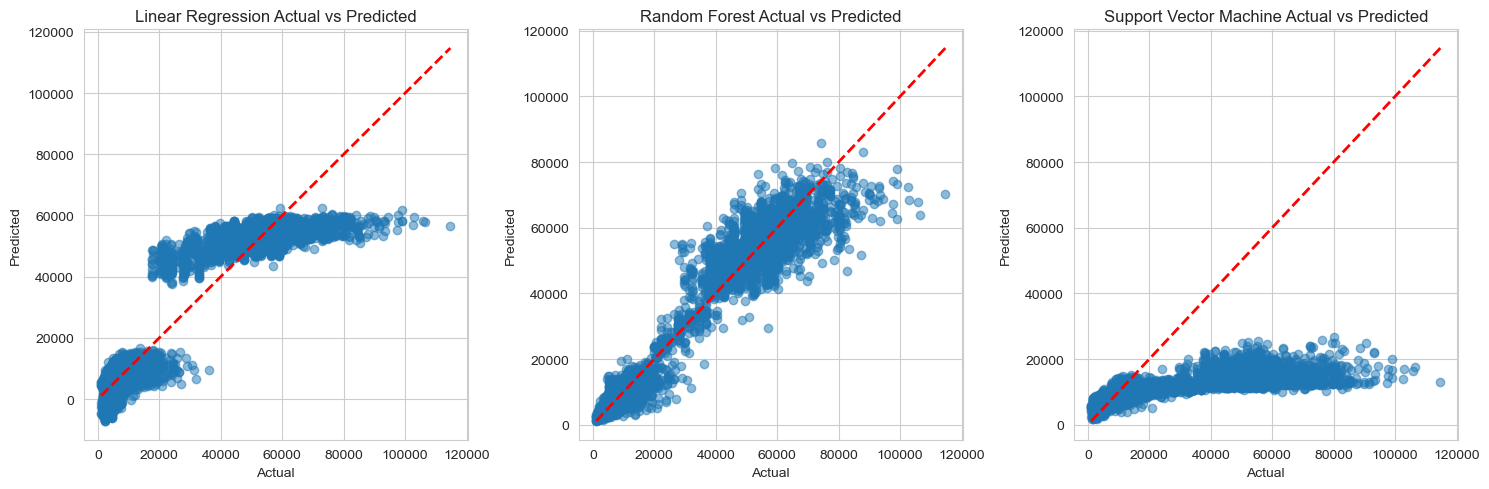

In [22]:
import matplotlib.pyplot as plt

# Initialize subplots
fig, axes = plt.subplots(1, len(best_models), figsize=(15, 5))

# Iterate through each model and plot actual vs predicted
for i, (model_name, model_info) in enumerate(best_models.items()):
    best_model = model_info['best_model']
    y_pred_best = best_model.predict(X_test_sub)

    # Plot actual vs predicted
    axes[i].scatter(y_test_sub, y_pred_best, alpha=0.5)
    axes[i].plot([y_test_sub.min(), y_test_sub.max()], [y_test_sub.min(), y_test_sub.max()], 'r--', lw=2)
    axes[i].set_title(f"{model_name} Actual vs Predicted")
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success" style="font-size:16px">
    <b>Analysis:</b>
     Based on the analysis of different machine learning models for predicting airline prices, here are some conclusions we can draw:
</div>

<div style="margin-bottom: 20px;"></div> <!-- New line space -->

<div class="alert alert-block alert-info" style="font-size:16px">
    <b>Linear Regression:</b>
    The Linear Regression model achieves a relatively high R-squared value of 0.91, indicating that approximately 91% of the variance in airline prices can be explained by the model.
    However, the Mean Absolute Error (MAE) and Mean Squared Error (MSE) are relatively high compared to other models, suggesting that the model's predictions deviate from the actual prices by a considerable margin.
</div>

<div style="margin-bottom: 20px;"></div> <!-- New line space -->

<div class="alert alert-block alert-info" style="font-size:16px">
    <b>Random Forest:</b>
    The Random Forest model outperforms Linear Regression with a higher R-squared value of 0.96, indicating better performance in explaining the variance in airline prices.
    The MAE and MSE are significantly lower compared to Linear Regression, suggesting that the Random Forest model provides more accurate predictions of airline prices.
</div>

<div style="margin-bottom: 20px;"></div> <!-- New line space -->

<div class="alert alert-block alert-info" style="font-size:16px">
    <b>Support Vector Machine (SVM):</b>
    The SVM model performs the worst among the three models, with a negative R-squared value indicating poor performance in explaining the variance in airline prices.
    Both MAE and MSE are substantially higher compared to the other models, indicating significant prediction errors.
</div>

<div style="margin-bottom: 20px;"></div> <!-- New line space -->

<div class="alert alert-block alert-success" style="font-size:16px">
    <b>Conclusion:</b>
    In summary, based on these results:
    - The Random Forest model appears to be the most suitable for predicting airline prices, as it achieves the highest R-squared value and lowest prediction errors (MAE and MSE).
    - Linear Regression also performs reasonably well but exhibits higher prediction errors compared to Random Forest.
    - The Support Vector Machine model performs poorly in predicting airline prices compared as our other models.
    Therefore, if the goal is to accurately predict airline prices, the Random Forest model would be the preferred choice among the models evaluated in this analysis.
</div>


### Training the Best Model - Random Forest 

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Define the best hyperparameters
best_rf_params = {
    'n_estimators': 100,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# Print a message indicating that model training is in progress
print("Training Random Forest model...")

best_rf_model = RandomForestRegressor(**best_rf_params)
best_rf_model.fit(X_train_transform, y_train)

# Print a message indicating that model training is complete
print("Random Forest model training complete.")

Training Random Forest model...
Random Forest model training complete.


## Evaluation of the Random Forest Model

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already computed y_test, y_pred
# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test_transform)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Random Forest Metrics:
Mean Absolute Error (MAE): 1329.0506684057743
Mean Squared Error (MSE): 9637961.05042751
R-squared (R2): 0.9813030213751088


<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Visualisation of ML Results</p>
</div>

### Price Vs Days Left (using Model Results)
To quantify how price varies with change in number of days left, we visualised it using a plot.

In [25]:
flights_data_merge = flights_data.copy()
final = pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=flights_data_merge.merge(final,left_index=True,right_index=True)

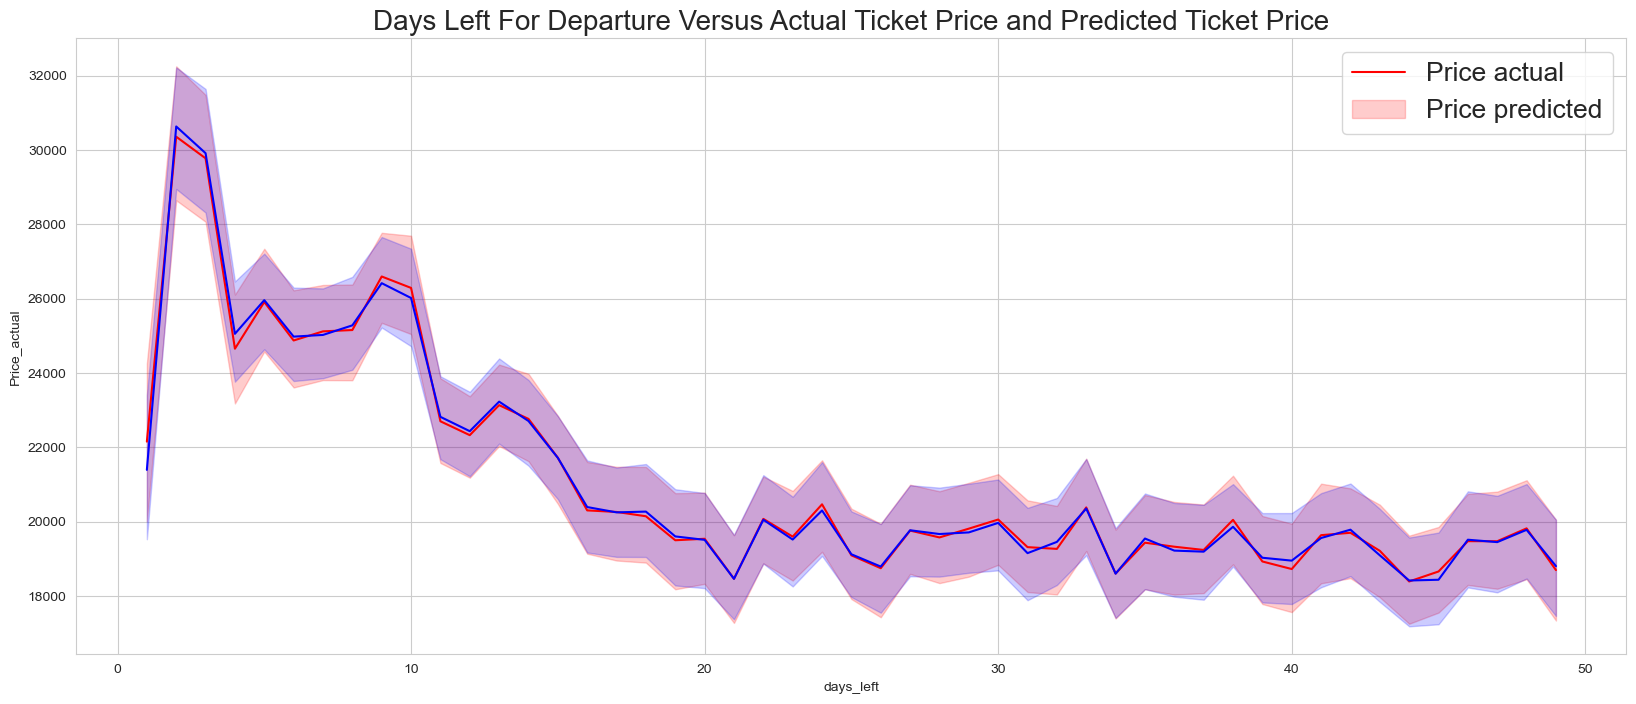

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.show()

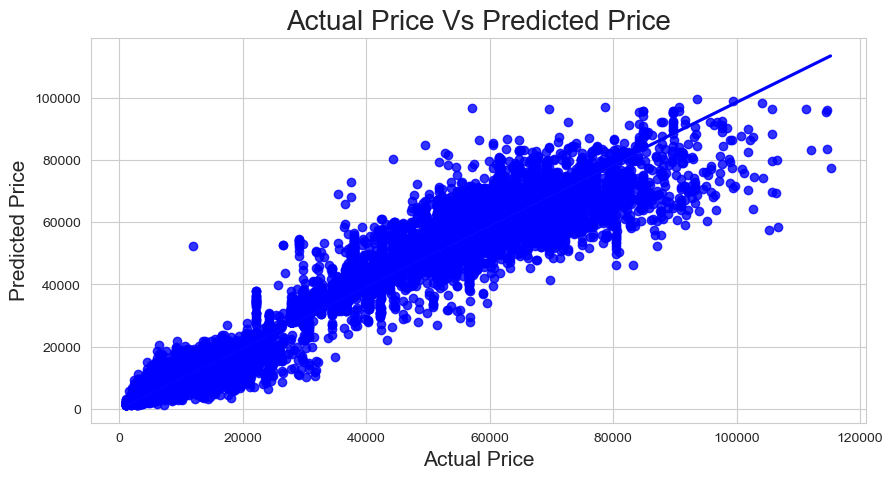

In [27]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual', y='Price_pred', data=result, color='blue')
plt.title('Actual Price Vs Predicted Price', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()

<div style="font-family: Verdana; word-spacing: 1.5px;">
    <p style="background-color: #3498db; color: white; text-align: center; font-size: 175%; padding: 10px;">Key Insights</p>
</div>

## Here are our key insights: 

**1)** The RandomForest performs best on the test dataset, achieving an R^2 score of 0.9812 and an MAE score of 1329.

**2)** Vistara and AirIndia emerge as the priciest companies, while AirAsia offers the most budget-friendly options. However, for business tickets, only Vistara and AirIndia are available, with Vistara being marginally pricier. Airlines may differentiate themselves based on the level of service and amenities provided onboard, such as seating comfort, in-flight entertainment, meals, and customer service. Higher-priced airlines often offer more luxurious or comprehensive services compared to budget airlines like AirAsia, which may reflect in their ticket prices.

**3)** Generally, ticket prices exhibit gradual increases until 20 days before the flight, after which they escalate dramatically. However, the day before the flight often sees unsold seats, allowing for tickets to be found at one-third of the price compared to the previous day. This pattern suggests that airlines may reduce ticket prices close to the departure date to fill empty seats and ensure high occupancy on their planes.

**4)** Ticket prices tend to rise with the duration of the flight. This is likely due to the fact that long flights typically require more fuel consumption, which is a significant operational cost for airlines. As the flight duration increases, so does the fuel consumption, leading to higher operating expenses. Airlines often pass on these increased costs to passengers through higher ticket prices.

**5)** Regarding the flight time:
Departures during the afternoon and late night tend to be cheaper, while nighttime departures are pricier. This might be because, many travelers prefer not to depart during the late-night or early-morning hours due to inconvenience or discomfort, leading to decreased demand and lower prices during these times.

**6)** Regarding the cities of the trip:
Flights departing from Delhi are the most economical, while those from other cities exhibit comparable prices, slightly favoring Chennai.
Flights to Delhi are the most affordable, whereas those to Bengaluru are the costliest. Generally, flights with more stops tend to have higher ticket prices.